## **Analyzing Immigration to Canada from 1980 to 2013**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Data Exploration**

In [21]:
df = pd.read_excel('/content/Canada.xlsx', 
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [22]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [61]:
df.shape

(195, 38)

### **Preprocessing**

In [25]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [26]:
df.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'},inplace=True)

df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [27]:
df['Total'] = df.iloc[:,4:].sum(axis=1)

In [28]:
df.set_index('Country', inplace=True)

In [33]:
#Converting years from int64 to str
df.columns = list(map(str, df.columns))

years = list(map(str, range(1980, 2014)))

In [34]:
#changing United Kingdom of Great Britain and Northern Ireland into UK
new_index = []
for country in df.index:
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        country ='UK'
    new_index.append(country)
    
df.index = new_index

In [35]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [71]:
df['Continent'].unique()

array(['Oceania', 'Africa', 'Europe', 'Northern America', 'Asia',
       'Latin America and the Caribbean'], dtype=object)

### **Data Visualization**

Visualization functions for area plot and basic continent statistics

In [37]:
def make_basic_continent_stat(continent):
    """
    Compute and return basic statistics of immigration numbers for the top 3 countries in a continent.

    """
    print(f'Total immigration basic statistics for the top 5 countries in {continent}:')
    
    # Subset the DataFrame to include only rows corresponding to the given continent, 
    # then compute the Total column's basic statistics for the top 3 countries.
    top5 = df.loc[df['Continent'] == continent].nlargest(5, 'Total')['Total'].describe()
    
    return top5

In [90]:
def create_area_plot(continent):
    # Subset the DataFrame to include only rows corresponding to the given continent
    df_continent = df[df['Continent'] == continent]
    
    # Sort the DataFrame by the Total column in descending order, and get the top 5 rows
    df_top5 = df_continent.sort_values(['Total'], ascending=False).head(5)
    
    # Transpose the DataFrame to have years as the index and country names as columns
    df_top5 = df_top5[years].transpose()
    
    # Change the index to type integer for plotting
    df_top5.index = df_top5.index.map(int)
    
    # Create the area plot
    df_top5.plot(kind='area',
                 stacked=False,
                 figsize=(20, 10),
                 )
    
    # Add labels and title
    plt.title(f'Immigration Trend of Top 5 Countries in {continent}')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')
    
    plt.show()

### **1. Immigration from Europe**

In [72]:
make_basic_continent_stat('Europe')

Total immigration basic statistics for the top 5 countries in Europe:


count         5.000000
mean     193516.800000
std      201529.333513
min       74167.000000
25%       93585.000000
50%      109091.000000
75%      139241.000000
max      551500.000000
Name: Total, dtype: float64

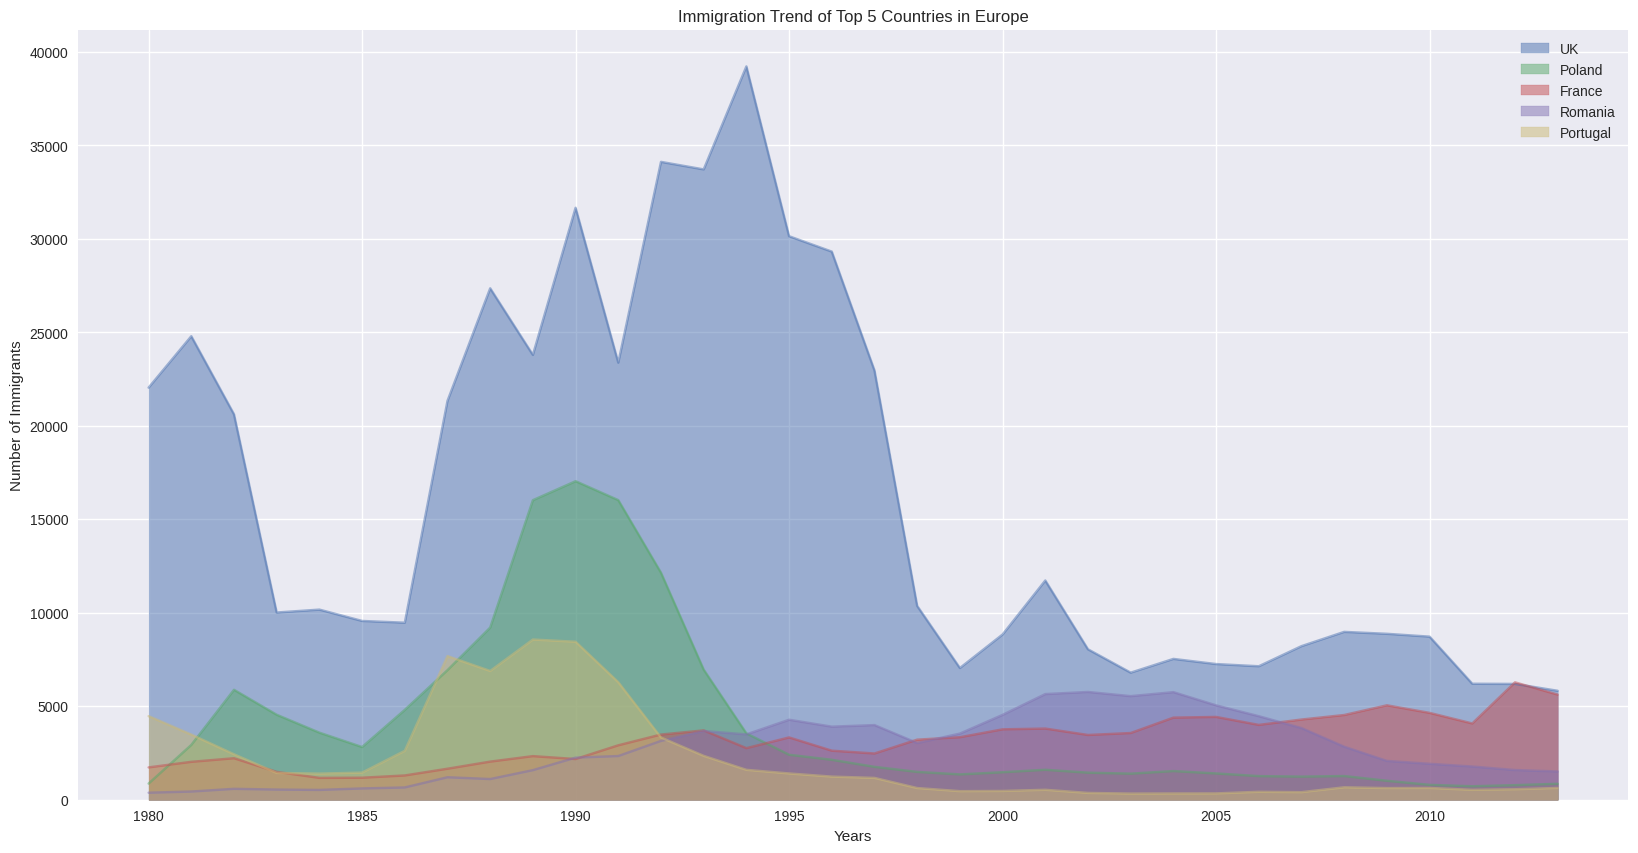

In [100]:
create_area_plot('Europe')

### **1.1 Immigration from Asia**

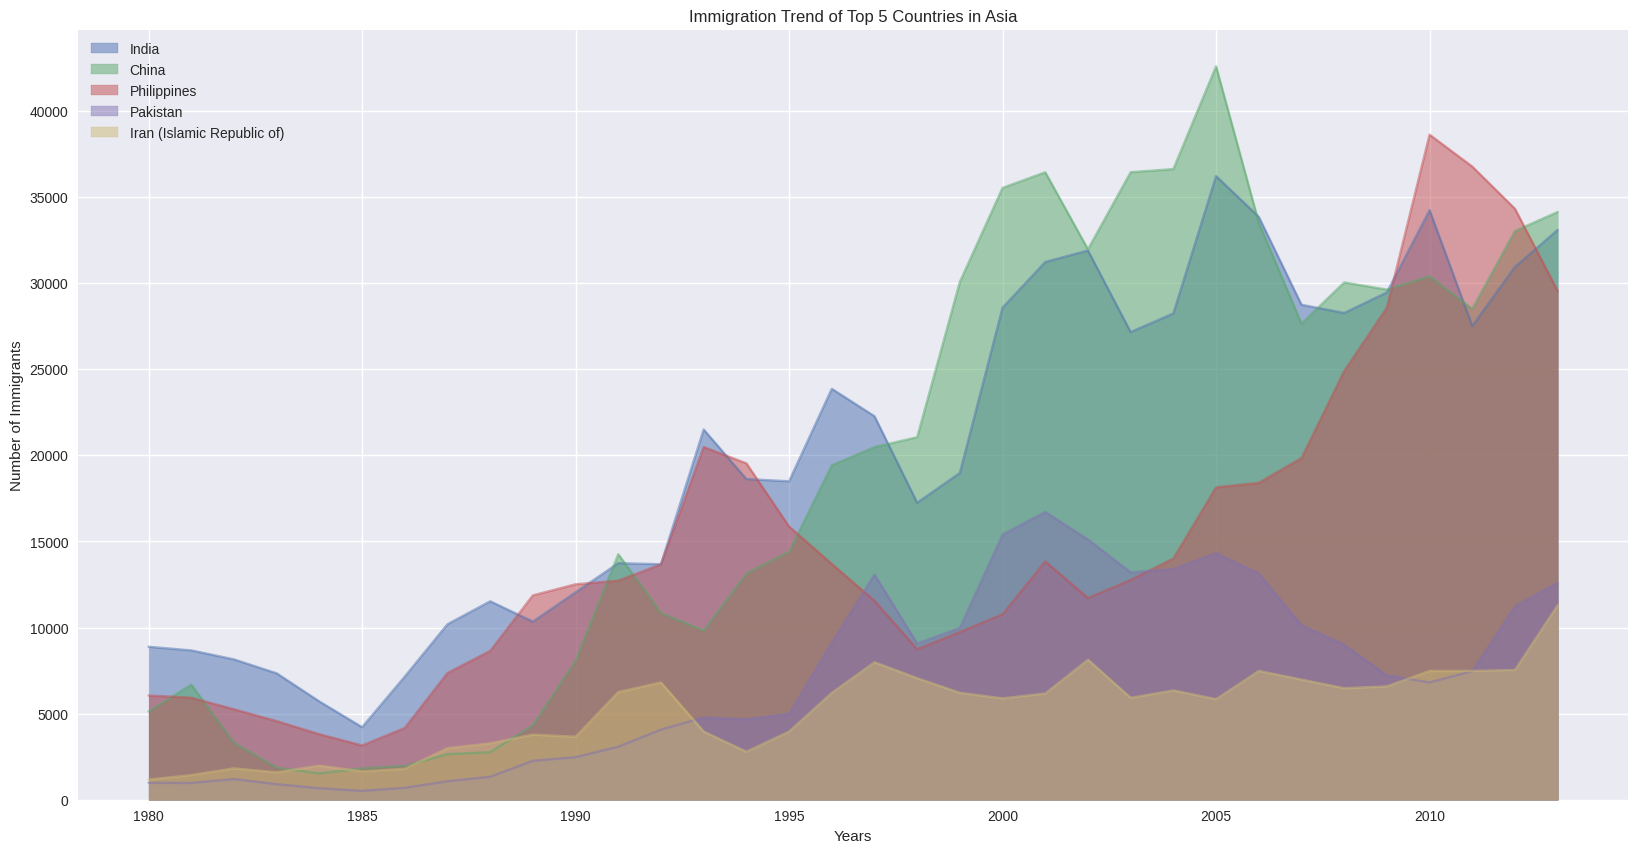

In [91]:
create_area_plot('Asia')

### **2. Top 10 Immigration Countries** 

In [54]:
df.sort_values(by='Total', ascending=True, inplace=True)
df_top10 = df['Total'].tail(10)
df_top10

Poland                        139241
Republic of Korea             142581
Sri Lanka                     148358
Iran (Islamic Republic of)    175923
United States of America      241122
Pakistan                      241600
Philippines                   511391
UK                            551500
China                         659962
India                         691904
Name: Total, dtype: int64

<ipython-input-110-7bb04c49b622>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[Text(0, 0, 'POLAND'),
 Text(0, 1, 'REPUBLIC OF KOREA'),
 Text(0, 2, 'SRI LANKA'),
 Text(0, 3, 'IRAN (ISLAMIC REPUBLIC OF)'),
 Text(0, 4, 'UNITED STATES OF AMERICA'),
 Text(0, 5, 'PAKISTAN'),
 Text(0, 6, 'PHILIPPINES'),
 Text(0, 7, 'UK'),
 Text(0, 8, 'CHINA'),
 Text(0, 9, 'INDIA')]

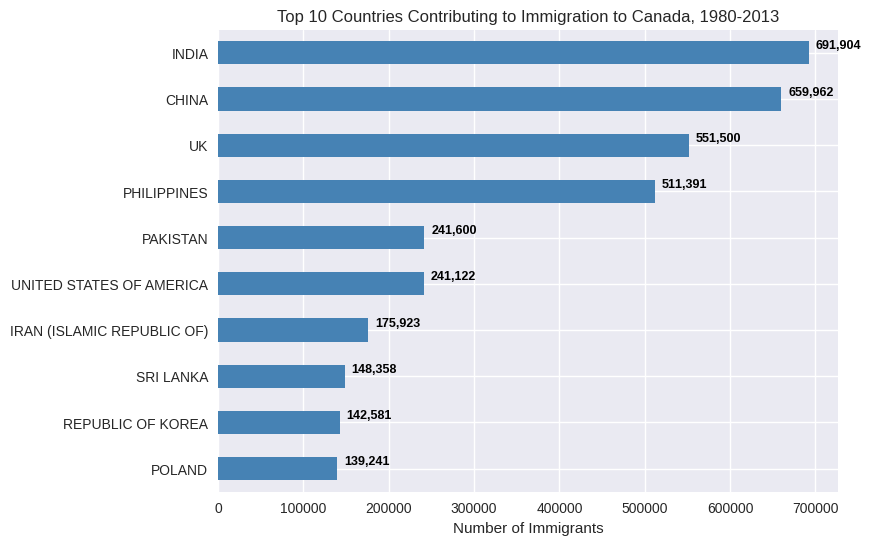

In [110]:
# Set the style for the plot
plt.style.use('seaborn')

# Create the horizontal bar plot
ax = df_top10.plot(kind='barh', figsize=(8, 6), color='steelblue')

# Add x-axis label and title
plt.xlabel('Number of Immigrants')
plt.title('Top 10 Countries Contributing to Immigration to Canada, 1980-2013')

# Add annotations for each bar
for i, value in enumerate(df_top10):
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value, i), xytext=(5, 5),
                 textcoords='offset points', ha='left', va='center',
                 fontsize=9, fontweight='bold', color='black')

# Customize the y-axis ticks
yticks = ax.get_yticks()
labels = df_top10.index.str.upper()
ax.set_yticklabels(labels, fontsize=10)


### **2.1 Least 10 Immigration Countries** 

In [111]:
def bottom_10_countries(df):
    """
    Create a horizontal bar plot showing the bottom 10 countries contributing to emigration from a DataFrame.
    """
    # Sort the DataFrame by total immigration in ascending order.
    df.sort_values(by='Total', ascending=True, inplace=True)
    
    # Subset the DataFrame to the bottom 10 countries by total immigration.
    df_bottom10 = df['Total'].head(10)
    
    # Set the style for the plot.
    plt.style.use('seaborn')
    
    # Create the horizontal bar plot.
    ax = df_bottom10.plot(kind='barh', figsize=(8, 6), color='steelblue')
    
    # Add x-axis label and title.
    plt.xlabel('Number of Immigrants')
    plt.title('Bottom 10 Countries Contributing to Emigration from 1980-2013')
    
    # Add annotations for each bar.
    for i, value in enumerate(df_bottom10):
        label = format(int(value), ',') # format int with commas
        plt.annotate(label, xy=(value, i), xytext=(5, 5),
                     textcoords='offset points', ha='left', va='center',
                     fontsize=9, fontweight='bold', color='black')
    
    # Customize the y-axis ticks.
    yticks = ax.get_yticks()
    labels = df_bottom10.index.str.upper()
    ax.set_yticklabels(labels, fontsize=10)
    
    # Show the plot.
    plt.show()


<ipython-input-111-c4c4b58501cc>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


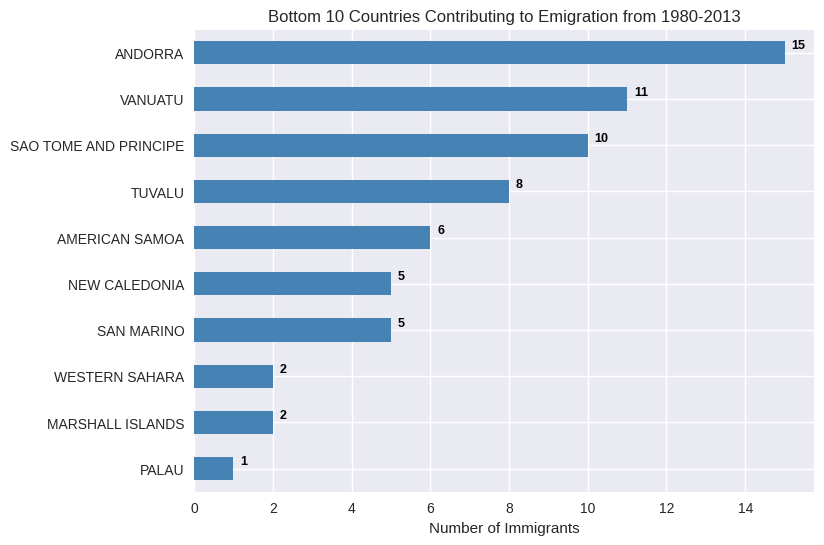

In [112]:
bottom_10_countries(df)

### **3. Emigration by Continent** 

In [62]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


<ipython-input-120-0e67337c9389>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


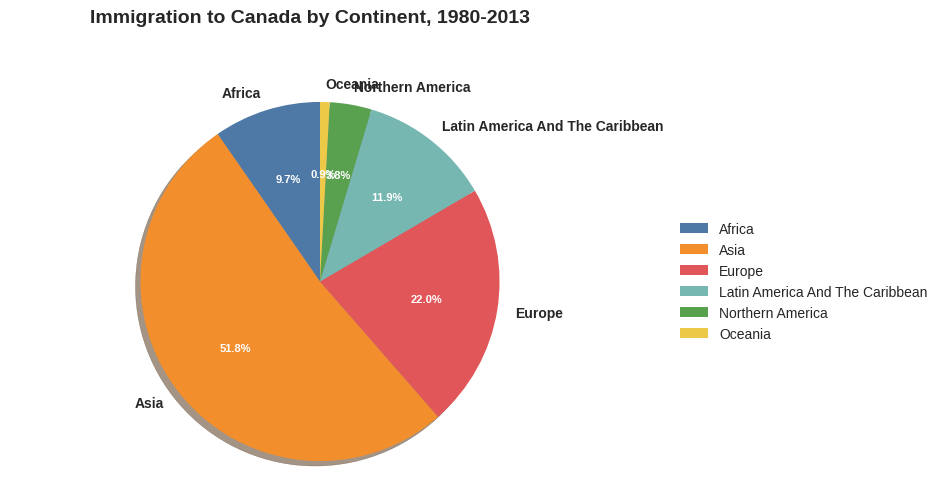

In [120]:
# Set the style for the plot
plt.style.use('seaborn')

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax.pie(df_continents['Total'],
                                  labels=df_continents.index.str.title(),
                                  autopct='%1.1f%%',  # add in percentages
                                  startangle=90,      # start angle 90° (Africa)
                                  shadow=True,        # add shadow
                                  colors=['#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f', '#edc948', '#b07aa1'])

# Set properties for the text and annotation of the wedges
plt.setp(texts, fontsize=10, fontweight='bold')
plt.setp(autotexts, fontsize=8, fontweight='bold', color='white')

# Set the aspect ratio to be equal to make the chart circular
ax.axis('equal')

# Add a legend to the right of the chart
ax.legend(wedges, df_continents.index.str.title(), loc="right", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title at the figure level and add a gap between the title and the plot
fig.suptitle('Immigration to Canada by Continent, 1980-2013', fontsize=14, fontweight='bold', y=1.05)

# Adjust the spacing between the title and the plot
fig.subplots_adjust(top=0.90)


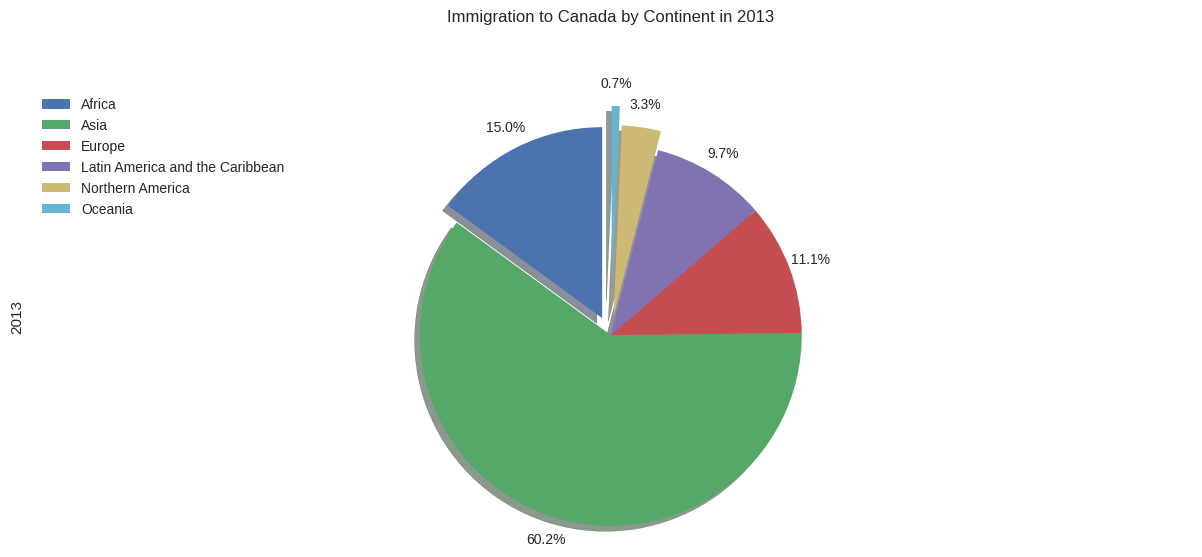

In [118]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()

### **4. Emigration Comparison between India & China**

In [121]:
df_CI= df.loc[['China', 'India'], years].transpose()
df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


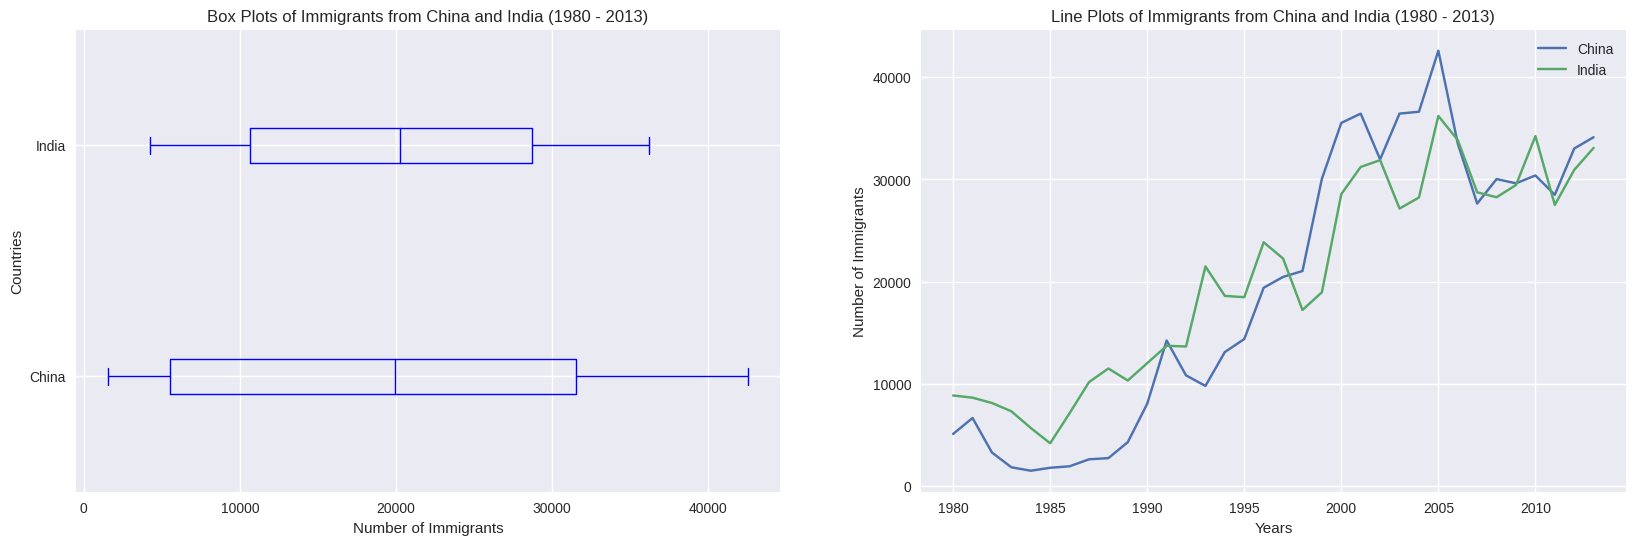

In [66]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()